In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dataset = 'Robust'
cols = ['method', 'dataset', 'nrow', 'depth', '?', 'time_limit', 'solve_code', 'obj_value', 'gap',
       'solving_time', 'regret_train', 'best_found_train', 'treatment_acc_train', 'regret_test', 'best_found_test',
       'treatment_acc_train', 'infer_prop', 'infer_yhat', 'seed']
df = pd.DataFrame(columns=cols)

In [8]:
probs = ['0.33', 'r0.06', 'r0.11']
for d in os.listdir('Results_Warfarin_prob'):
    print(d)
    if os.path.isdir(os.path.join('Results_Warfarin_prob', d)):
        for seed in os.listdir(os.path.join('Results_Warfarin_prob', d)):
            if os.path.isdir(os.path.join('Results_Warfarin_prob', d, seed)):
                for i in os.listdir(os.path.join('Results_Warfarin_prob', d, seed)):
                    if '.csv' in i:
                        df_buffer = pd.read_csv(os.path.join('Results_Warfarin_prob', d, seed, i), header=None)
        #                 print(df_buffer.iloc[0].tolist())
                        if d == 'IPW':
                            df.loc[len(df)] = df_buffer.iloc[0].tolist() + [np.nan, int(seed[-1])]
                        else:
                            df.loc[len(df)] = df_buffer.iloc[0].tolist() + [int(seed[-1])]

Robust
.DS_Store
IPW
figures
DM
.ipynb_checkpoints
combine_csv.ipynb


In [9]:
df['exp_prob'] = df['dataset'].apply(lambda x: x.split('_')[-2])

In [10]:
df['best_found_test'] = df['best_found_test']/100

In [11]:
df[df['depth'].isin([2, 3])][['method', 'exp_prob', 
                              'best_found_test', 'regret_test', 'gap']].groupby(['method', 'exp_prob']).agg('mean')

best_found_test        gap
method exp_prob                            
Direct 0.33             0.844964   2.819649
       r0.06            0.739885   2.056485
       r0.11            0.632756   1.674400
IPW    0.33             0.849766   5.971130
       r0.06            0.653232  12.348215
       r0.11            0.651299  11.614931
Robust 0.33             0.836069   7.481110
       r0.06            0.741856   6.049073
       r0.11            0.644117   5.545682

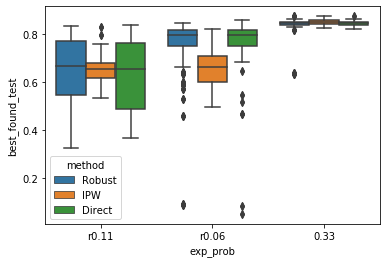

In [12]:
sns.boxplot(data=df[df['depth'].isin([2, 3])], x="exp_prob", y="best_found_test", hue='method')

In [32]:
df[df['depth'] == 2]['solve_code'].value_counts()

2    722
9     10
Name: solve_code, dtype: int64

In [33]:
df[(df['depth'] == 2) & (df['solve_code'] == 2)]

,method,dataset,nrow,depth,?,time_limit,solve_code,obj_value,gap,solving_time,regret_train,best_found_train,treatment_acc_train,regret_test,best_found_test,treatment_acc_train,infer_prop,infer_yhat,seed,exp_prob
107,Robust,data_train_enc_r0.11_2,3000,2,100.0,3600,9,2822.329704,4.690092,3609.576240,953,68.233333,66.400000,433,0.687590,66.594517,tree,ml,5,r0.11
122,Robust,data_train_enc_r0.11_5,3000,2,100.0,3600,9,2818.761227,7.389439,3606.825844,662,77.933333,77.466667,312,0.774892,77.417027,tree,ml,5,r0.11
287,Robust,data_train_enc_r0.11_2,3000,2,100.0,3600,9,2822.329704,4.690092,3609.576240,953,68.233333,66.400000,433,0.687590,66.594517,tree,ml,5,r0.11
302,Robust,data_train_enc_r0.11_5,3000,2,100.0,3600,9,2818.761227,7.389439,3606.825844,662,77.933333,77.466667,312,0.774892,77.417027,tree,ml,5,r0.11
512,Robust,data_train_enc_r0.11_2,3000,2,100.0,3600,9,2822.329704,4.690092,3609.576240,953,68.233333,66.400000,433,0.687590,66.594517,tree,ml,5,r0.11
527,Robust,data_train_enc_r0.11_5,3000,2,100.0,3600,9,2818.761227,7.389439,3606.825844,662,77.933333,77.466667,312,0.774892,77.417027,tree,ml,5,r0.11
961,Robust,data_train_enc_r0.11_2,3000,2,100.0,3600,9,2822.329704,4.690092,3609.576240,953,68.233333,66.400000,433,0.687590,66.594517,tree,ml,5,r0.11
976,Robust,data_train_enc_r0.11_5,3000,2,100.0,3600,9,2818.761227,7.389439,3606.825844,662,77.933333,77.466667,312,0.774892,77.417027,tree,ml,5,r0.11
1634,Robust,data_train_enc_r0.11_2,3000,2,100.0,3600,9,2822.329704,4.690092,3609.576240,953,68.233333,66.400000,433,0.687590,66.594517,tree,ml,5,r0.11
1649,Robust,data_train_enc_r0.11_5,3000,2,100.0,3600,9,2818.761227,7.389439,3606.825844,662,77.933333,77.466667,312,0.774892,77.417027,tree,ml,5,r0.11


In [ ]:
df[df['depth'] == 2]['solve_code'].value_counts()

In [34]:
all_df = pd.DataFrame(columns=['method', 'exp_prob', 'best_found_test', 'depth'])

In [35]:
other_methods = 'other_methods/results'

In [36]:
policytree = pd.read_csv(os.path.join(other_methods, 'policytree', 'warfarin', 'raw_proba.csv'))
policytree = policytree.rename(columns={'random': '0.33'})

In [37]:
for i in policytree.columns:
    df_buffer = pd.DataFrame({'method': ['policytree']*len(policytree), 'exp_prob': [i]*len(policytree),
                             'best_found_test': policytree[i], 'depth': [2]*len(policytree)})
    all_df = pd.concat([all_df, df_buffer], ignore_index=True)

In [38]:
cf = pd.read_csv(os.path.join(other_methods, 'CF', 'warfarin', 'cf_baseline_yhat_what_raw.csv'))
cf = cf.rename(columns={'random': '0.33'})

In [39]:
for i in cf.columns:
    df_buffer = pd.DataFrame({'method': ['CF']*len(cf), 'exp_prob': [i]*len(cf),
                             'best_found_test': cf[i], 'depth': [np.nan]*len(cf)})
    all_df = pd.concat([all_df, df_buffer], ignore_index=True)

In [40]:
ct = pd.read_csv(os.path.join(other_methods, 'CF', 'warfarin', 'ct_baseline_yhat_what_raw.csv'))
ct = ct.rename(columns={'random': '0.33'})

In [41]:
ct

,0.33,r0.06,r0.11
0,0.829004,0.282828,0.363636
1,0.816017,0.284993,0.328283
2,0.810245,0.306638,0.344877
3,0.838384,0.400433,0.421356
4,0.835498,0.373016,0.396825
5,0.841991,0.212843,0.296537
6,0.827561,0.352092,0.396104
7,0.816739,0.292208,0.269120
8,0.831890,0.234488,0.299423
9,0.787157,0.252525,0.313853


In [42]:
for i in ct.columns:
    df_buffer = pd.DataFrame({'method': ['CT']*len(ct), 'exp_prob': [i]*len(ct),
                             'best_found_test': ct[i], 'depth': [np.nan]*len(ct)})
    all_df = pd.concat([all_df, df_buffer], ignore_index=True)

In [43]:
rc = pd.read_csv(os.path.join(other_methods, 'RC', 'warfarin', 'raw.csv'))

In [44]:
rc = rc.drop(columns=['seed', 'dataset']).rename(columns={'randomization': 'exp_prob',
                                                         'oopt': 'best_found_test'})

In [45]:
all_df = pd.concat([all_df, rc], ignore_index=True)

In [46]:
all_df = pd.concat([all_df, df[(df['depth'] == 2) & (df['solve_code'] == 2)][['method', 'exp_prob', 'best_found_test', 'depth']]], ignore_index=True)

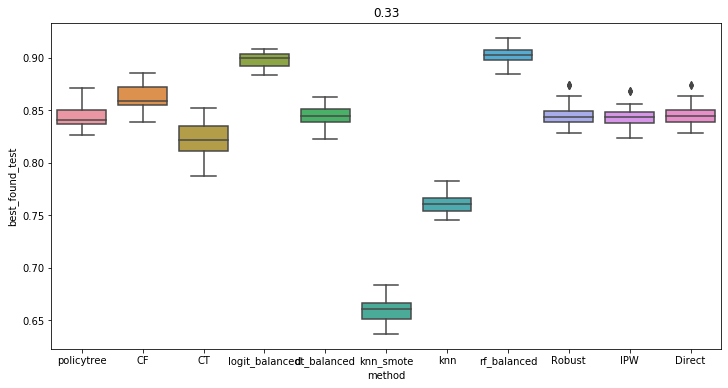

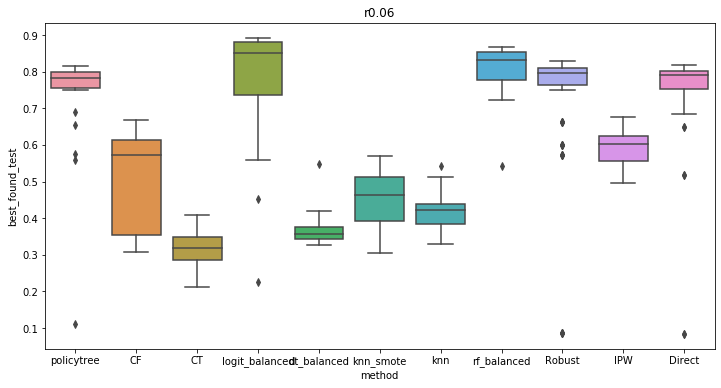

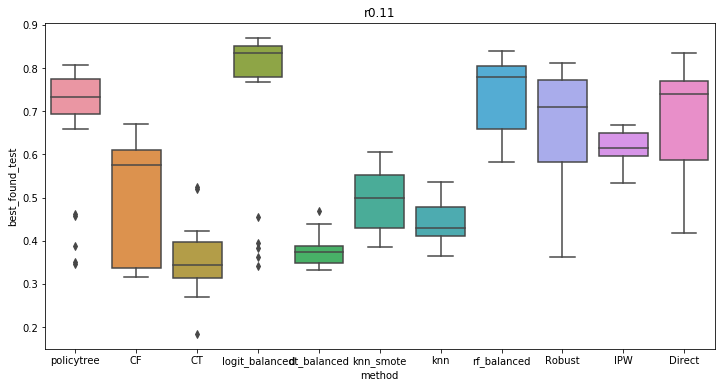

In [47]:
for prob in all_df['exp_prob'].unique():
    plt.figure(figsize=(12, 6))
    subset = all_df[all_df['exp_prob'] == prob]
    sns.boxplot(data=subset, x='method', y='best_found_test')
    plt.title(prob)
    plt.show()

In [83]:
sns.boxplot(data=all_df, x="exp_prob", y="best_found_test", hue='method')

,method,exp_prob,best_found_test,depth
0,policytree,0.33,0.837662,2
1,policytree,0.33,0.839105,2
2,policytree,0.33,0.844156,2
3,policytree,0.33,0.826118,2
4,policytree,0.33,0.855700,2
...,...,...,...,...
595,rf_balanced,r0.06,0.721501,NaN
596,rf_balanced,r0.06,0.857143,NaN
597,rf_balanced,r0.06,0.743867,NaN
598,rf_balanced,r0.06,0.842713,NaN
